In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


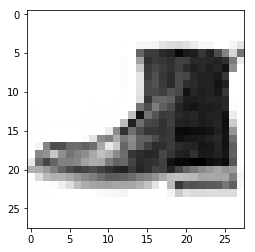

In [35]:
mnist = input_data.read_data_sets('data/fashion', one_hot=True)
plt.imshow(
    mnist.train.images[3].reshape(28, 28),
    cmap='Greys',
    interpolation='nearest')
plt.show()

In [50]:
nb_classes = 10

fashion_mnist_labels = ["T-shirt/top",  # 인덱스 0
                        "Trouser",      # 인덱스 1
                        "Pullover",     # 인덱스 2 
                        "Dress",        # 인덱스 3 
                        "Coat",         # 인덱스 4
                        "Sandal",       # 인덱스 5
                        "Shirt",        # 인덱스 6 
                        "Sneaker",      # 인덱스 7 
                        "Bag",          # 인덱스 8 
                        "Ankle boot"]   # 인덱스 9

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W = tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [51]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [52]:
# parameters
training_epochs = 15
batch_size = 100

Epoch: 0001 cost = 2.708928482
Epoch: 0002 cost = 1.504865933
Epoch: 0003 cost = 1.257874221
Epoch: 0004 cost = 1.122679798
Epoch: 0005 cost = 1.030152542
Epoch: 0006 cost = 0.966148198
Epoch: 0007 cost = 0.915950017
Epoch: 0008 cost = 0.876504464
Epoch: 0009 cost = 0.838217509
Epoch: 0010 cost = 0.808076873
Epoch: 0011 cost = 0.785625913
Epoch: 0012 cost = 0.763642579
Epoch: 0013 cost = 0.742041309
Epoch: 0014 cost = 0.722517629
Epoch: 0015 cost = 0.709174096
Learning finished
Accuracy:  0.7959
Label:  Sandal
Prediction:  Sandal


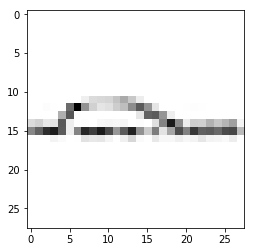

In [62]:
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)

        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict={
                            X: batch_xs, Y: batch_ys})
            avg_cost += c / total_batch

        print('Epoch:', '%04d' % (epoch + 1),
              'cost =', '{:.9f}'.format(avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={
          X: mnist.test.images, Y: mnist.test.labels}))
    
    Label = sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1))
    Prediction = sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]})
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples-1)
    print("Label: ", fashion_mnist_labels[Label[0]])
    print("Prediction: ", fashion_mnist_labels[Prediction[0]])

    plt.imshow(
        mnist.test.images[r-1].reshape(28, 28),
        cmap='Greys',
        interpolation='nearest')
    plt.show()